## BFGS

In [8]:
from scipy import optimize
import numpy as np

In [9]:
def bgfs(f, fprime, x0, num_epochs=200, epsilon=1e-10):
    n = len(x0)
    x = np.zeros((num_epochs+1, n))
    x[0] = np.array(x0)
    H = np.identity(n)
    for k in range(1, num_epochs+1):
        if np.linalg.norm(fprime(x[k-1])) < epsilon:
            print("the number of iteration: ", k)
            break
        if k == num_epochs:
            print("The num_epochs was reached, please increase it!")
            return None, None
        p = - H @ fprime(x[k-1])
        alpha = optimize.line_search(f, fprime, x[k-1], p)[0]
        s = alpha * p
        x[k] = x[k-1] + s
        y = fprime(x[k]) - fprime(x[k-1])
        rho = 1.0 / (y @ s)
        I = np.identity(n)        
        s = s.reshape(-1, 1)
        y = y.reshape(-1, 1)
        H = (I - rho * s @ y.T) @ H @ (I - rho * y @ s.T) + rho * s @ s.T
    
    return x[k-1], x[:k-1]

## 1. $f(x,y)=(x-4)^2+(y-1)^2+100$, 找到它的最小值

In [10]:
from autograd import grad

In [11]:
f = lambda X: (X[0] - 4)**2 + (X[1] - 1)**2 + 100

In [12]:
fprime = grad(f)
mini, iter_pts = bgfs(f, fprime, x0=[0., 0.])
mini

the number of iteration:  2


array([4., 1.])

### 使用`Scipy`

In [59]:
optimize.fmin_bfgs(f, x0=[0., 0.], fprime=fprime)

Optimization terminated successfully.
         Current function value: 100.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4


array([4., 1.])

## 2. $f(x,y)=(1-x)^2+100(y-x^2)^2$

In [52]:
import ipyvolume.pylab as plt3d
import matplotlib.pyplot as plt

In [53]:
g = lambda X: (1 - X[0])**2 + 100 * ((X[1] - X[0]**2))**2

In [54]:
x1n = np.linspace(-10, 10, 100)
x2n = np.linspace(-10, 10, 100)
xx1n, xx2n = np.meshgrid(x1n, x2n)
XX = np.c_[xx1n.ravel(), xx2n.ravel()]
gn = np.array([g(xx) for xx in XX]).reshape(xx1n.shape)

plt3d.figure(width=1000, height=500)
plt3d.plot_surface(xx1n, gn, xx2n, color="green")
plt3d.xlabel("x")
plt3d.zlabel("y")
plt3d.ylabel("g")
plt3d.show()

In [55]:
gprime = grad(g)
mini, iter_pts = bgfs(g, gprime, x0=[-4., 8.])
mini

the number of iteration:  39


array([1., 1.])

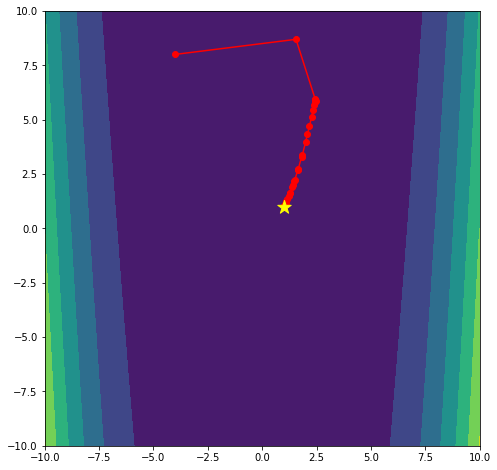

In [57]:
plt.figure(figsize=(8, 8))
plt.contourf(xx1n, xx2n, gn)
plt.scatter(mini[0], mini[1], marker='*', color='yellow', s=200, zorder=3)
plt.scatter(iter_pts[:, 0], iter_pts[:, 1], c='r')
plt.plot(iter_pts[:, 0], iter_pts[:, 1], c='r')
plt.axis('square')
plt.show()

In [50]:
iter_path = [g(p) for p in iter_pts]

plt3d.figure(width=1000, height=500)
plt3d.plot_surface(xx1n, gn, xx2n, color="green")
plt3d.scatter(np.array([mini[0]]), np.array([g(mini)]), np.array([mini[1]]), 
              color='yellow', size=3)
plt3d.scatter(iter_pts[:, 0], np.array(iter_path), iter_pts[:, 1], 
              marker='sphere', size=3)
plt3d.plot(iter_pts[:, 0], np.array(iter_path), iter_pts[:, 1])
plt3d.xlabel("x")
plt3d.zlabel("y")
plt3d.ylabel("g")
plt3d.show()

### 使用`Scipy`

In [58]:
optimize.fmin_bfgs(g, x0=[0., 1000.], fprime=gprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 160
         Function evaluations: 211
         Gradient evaluations: 211


array([1.00000022, 1.00000047])